In [291]:
import numpy as np
import random
import matplotlib.pyplot as plt

### Parámetros

In [292]:
# Iniciar la poblacion
M = 10 #kb. Tamaño del genoma
g = 4 # Genes en la via de interes
num_especies = 10 #Num de especies para iniciar la poblacion

# Reorganizar el genoma por cada especie
rho = 0.01 # probabilidad de reacomodo

# Destruir función de especie positiva 
lambd = 0.001 # probabilidad de perdida de la funcion

# Transferencia horizontal
tau0 = 0.01 # probabilidad maxima de transferencia horizontal
alpha = 0.004

#Simulación
num_iteraciones = 500 #00

e = 25 #kb.  tolerancia al equilibrio entre el origen y el término 

### Iniciar la población

In [293]:
# Iniciar la población con 10 especies positivas
# Las especies positivas deben de tener g 1's en el genoma
# Los demás serán 0's

def inicializar_poblacion(M, num_especies, g):
    especies_positivas = []
    for _ in range(num_especies):
        genoma = [0] * M
        genes_asignados = 0

        while genes_asignados < g:
            indice_aleatorio = random.randint(0, M - 1)
            if genoma[indice_aleatorio] == 0:
                genoma[indice_aleatorio] = 1
                genes_asignados += 1

        especies_positivas.append(genoma)

    return especies_positivas

poblacion = inicializar_poblacion(M, num_especies, g)[:5]
poblacion

[[0, 1, 0, 0, 0, 0, 1, 1, 0, 1],
 [1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 0, 1, 1, 0, 1, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]]

### Reorganizar la población

In [159]:
# CORREGIR TRANSLOCACION
# Tenemos la proba rho = 0.01 y la poblacion anterior. 
# Para cada especie de la poblacion lo siguiente:
# -Escoger un numero aleatorio entre 0 y 1
#   -si este es mayor o igual a rho, el reacomodo sucede
# Escoger dos posiciones aleatorias (que no sean la misma)
# Cambiar los genes entre las posiciones
# tenemos nuestra nueva poblacion
# Las posiciones pueden ser ambas con 0´s por lo que no se notaria el cambio 

def reorganizar_genoma(poblacion, rho):
    nueva_poblacion = []
    for especie in poblacion:
        aleatorio = random.uniform(0, 1)

        if aleatorio >= rho:
            pos1 = random.randint(0, len(especie)-1)
            pos2 = random.randint(0, len(especie)-1)

            while pos1 == pos2: # Este ciclo es para que no sea la misma posicion seleccionada
                pos2 = random.randint(0, len(especie) - 1)

            especie[pos1], especie[pos2] = especie[pos2], especie[pos1]

        nueva_poblacion.append(especie)

    return nueva_poblacion

#rho = 0
poblacion_reorganizada = reorganizar_genoma(poblacion, rho)
poblacion_reorganizada

[[0, 1, 0, 0, 0, 0, 1, 1, 1, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 1, 1],
 [0, 0, 1, 0, 0, 1, 0, 1, 0, 1],
 [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
 [0, 0, 0, 1, 1, 0, 1, 1, 0, 0]]

In [294]:
def reorganizar_genoma(poblacion, rho):
    nueva_poblacion = []
    for especie in poblacion:
        print("Original:", especie)  # Imprimir la especie original
        aleatorio = random.uniform(0, 1)

        if aleatorio >= rho:
            pos1 = random.randint(0, len(especie) - 1)
            pos2 = random.randint(0, len(especie) - 1)

            while pos1 == pos2: # Este ciclo es para que no sea la misma posición seleccionada
                pos2 = random.randint(0, len(especie) - 1)

            print(f"Posiciones seleccionadas: {pos1} y {pos2}")

            # Intercambiar las posiciones
            if pos1 < pos2:
                especie.insert(pos1, especie.pop(pos2))
            else:
                especie.insert(pos1 - 1, especie.pop(pos2))

        print("Modificado:", especie)  # Imprimir la especie modificada
        nueva_poblacion.append(especie)

    return nueva_poblacion


#rho = 0
poblacion_reorganizada = reorganizar_genoma(poblacion, rho)
poblacion_reorganizada

Original: [0, 1, 0, 0, 0, 0, 1, 1, 0, 1]
Posiciones seleccionadas: 8 y 6
Modificado: [0, 1, 0, 0, 0, 0, 1, 1, 0, 1]
Original: [1, 0, 0, 1, 0, 1, 1, 0, 0, 0]
Posiciones seleccionadas: 9 y 3
Modificado: [1, 0, 0, 0, 1, 1, 0, 0, 1, 0]
Original: [0, 0, 0, 1, 0, 1, 0, 1, 0, 1]
Posiciones seleccionadas: 1 y 5
Modificado: [0, 1, 0, 0, 1, 0, 0, 1, 0, 1]
Original: [0, 0, 1, 1, 0, 1, 0, 1, 0, 0]
Posiciones seleccionadas: 1 y 6
Modificado: [0, 0, 0, 1, 1, 0, 1, 1, 0, 0]
Original: [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
Posiciones seleccionadas: 5 y 6
Modificado: [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]


[[0, 1, 0, 0, 0, 0, 1, 1, 0, 1],
 [1, 0, 0, 0, 1, 1, 0, 0, 1, 0],
 [0, 1, 0, 0, 1, 0, 0, 1, 0, 1],
 [0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]]

### Destruir especie

In [295]:
# Tomamos la poblacion_reorganizada
# Por cada especie:
# Escoger un numero aleario y si es mayor o igual a lambd eliminar la especie 

def destruir_especies(poblacion_reorganizada, lambd):
    nueva_poblacion = []

    for especie in poblacion_reorganizada:
        aleatorio = random.uniform(0, 1)

        if aleatorio < lambd:
            # Si el número aleatorio es menor que la probabilidad lambd, se destruye la especie
            continue

        nueva_poblacion.append(especie)

    return nueva_poblacion

#lambd = 0.5  
nueva_poblacion = destruir_especies(poblacion_reorganizada, lambd)
nueva_poblacion


[[0, 1, 0, 0, 0, 0, 1, 1, 0, 1],
 [1, 0, 0, 0, 1, 1, 0, 0, 1, 0],
 [0, 1, 0, 0, 1, 0, 0, 1, 0, 1],
 [0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]]

### Distancia arco

In [296]:
def posiciones(lista, long):
    contador = 1
    posiciones_ones = []
    for i in range(long):
        if lista[i] == 1:
            posiciones_ones.append(i)
            contador += 1
    return posiciones_ones

def procesar_posiciones(posiciones_1, long):
    p1_idx = 0
    p2_idx = -1
    diferencias = []

    while True:
        p1 = posiciones_1[p1_idx]
        p2 = posiciones_1[p2_idx]

        if p1 > p2:
            p2 += long

        diferencia = abs(p1 - p2)
        diferencias.append(diferencia)
        print(f"|p1={p1} - p2={p2}| => {diferencia}")

        p1_idx += 1
        p2_idx += 1

        if p1_idx >= len(posiciones_1) or p2_idx >= len(posiciones_1):
            break

        p2 %= long

    return diferencias

def distancia_arco(especie, long):
    posiciones1 = posiciones(especie, long)
    p_posiciones1 = procesar_posiciones(posiciones1, long)
    distancia_arco = min(p_posiciones1)
    return distancia_arco

poblacion = [
    [1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 1, 0, 1],
    [0, 1, 0, 0, 1, 0, 0, 1, 0, 1],
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 1, 0, 1]
]

for especie in poblacion:
    print(distancia_arco(especie, len(especie)))


|p1=0 - p2=7| => 7
|p1=6 - p2=10| => 4
|p1=7 - p2=16| => 9
4
|p1=2 - p2=9| => 7
|p1=3 - p2=12| => 9
|p1=7 - p2=13| => 6
|p1=9 - p2=17| => 8
6
|p1=1 - p2=9| => 8
|p1=4 - p2=11| => 7
|p1=7 - p2=14| => 7
|p1=9 - p2=17| => 8
7
|p1=0 - p2=4| => 4
|p1=1 - p2=10| => 9
|p1=3 - p2=11| => 8
|p1=4 - p2=13| => 9
4
|p1=2 - p2=9| => 7
|p1=6 - p2=12| => 6
|p1=7 - p2=16| => 9
|p1=9 - p2=17| => 8
6


### Transferencia horizontal

In [297]:
print(distancia_arco([0, 0, 1, 1, 0, 1, 0, 0, 0, 1],len(especie)))

|p1=2 - p2=9| => 7
|p1=3 - p2=12| => 9
|p1=5 - p2=13| => 8
|p1=9 - p2=15| => 6
6


In [298]:
def transferencia_horizontal(nueva_poblacion, tau0, alpha):
    if len(nueva_poblacion) < 90:
        # Calculamos la probabilidad de transferencia horizontal para cada especie
        probabilidades = [tau0 * np.exp(alpha * distancia_arco(especie), len(especie)) for especie in nueva_poblacion]
        
        for especie in nueva_poblacion:
            print(especie)
            print(distancia_arco(especie))
            

        # Para cada especie, comprobamos si se produce la transferencia horizontal
        especies_duplicadas = []
        for i, especie in enumerate(nueva_poblacion):
            aleatorio = random.uniform(0, 1)
            if aleatorio >= probabilidades[i]:
                # Si la probabilidad es mayor o igual que el número aleatorio, duplicamos la especie
                especies_duplicadas.append(especie)

        nueva_poblacion += especies_duplicadas
    #print('Probabilidades: ', probabilidades)
    return nueva_poblacion


In [300]:
poblacion_final = transferencia_horizontal(nueva_poblacion, tau0, alpha)
poblacion_final

TypeError: transferencia_horizontal() takes 3 positional arguments but 4 were given

### Distancia *i* promedio

In [301]:
def promedio_i(poblacion):
    suma_i = 0
    num_especies = len(poblacion)
    for especie in poblacion:
        distancia_arco_especie = distancia_arco(especie, long)
        suma_i += distancia_arco_especie
    promedio_i = suma_i / num_especies
    return promedio_i

promedio = promedio_i(poblacion_final)
print(promedio)


IndexError: list index out of range

### Correccion de traslocación

In [137]:
# Se hizo la correccion en la probabilidad rho
# Ahora es rho*(g/M)

def reorganizar_genoma(poblacion, rho):
    nueva_poblacion = []
    for especie in poblacion:
        aleatorio = random.uniform(0, 1)

        if aleatorio >= rho*(g / M):
            pos1 = random.randint(0, len(especie)-1)
            pos2 = random.randint(0, len(especie)-1)

            while pos1 == pos2: # Este ciclo es para que no sea la misma posicion seleccionada
                pos2 = random.randint(0, len(especie) - 1)

            especie[pos1], especie[pos2] = especie[pos2], especie[pos1]

        nueva_poblacion.append(especie)

    return nueva_poblacion

#rho = 0
poblacion_reorganizada = reorganizar_genoma(poblacion, rho)
poblacion_reorganizada

[[1, 0, 0, 0, 0, 1, 1, 1, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 1, 0, 1],
 [0, 1, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 1, 0, 1]]

### Versión con inversión

In [138]:
def inversion_viable(a, b):
    return ((0 < a < M / 2 and 0 < b < M / 2) or
            (M / 2 < a < M and M / 2 < b < M) or
            (M - e < a + b < M + e))
    
def realizar_inversion(genoma):
    a = random.randint(1, M)
    b = random.randint(1, M)
    a -= 0.5
    b -= 0.5
    if inversion_viable(a, b):
        genoma_modificado = genoma.copy()
        for i in range(len(genoma)):
            if a < genoma[i] < b:
                genoma_modificado[i] = a + b - genoma[i]
        return genoma_modificado
    else:
        print('Inversión no viable')
        return genoma

                
inversion = realizar_inversion(poblacion_reorganizada[0]) 
inversion

[1, 0, 0, 0, 0, 1, 1, 1, 0, 0]

### Primera Simulación

In [139]:
M = 5000 #kb. Tamaño del genoma
g = 3 # Genes en la via de interes
num_especies = 100 #Num de especies para iniciar la poblacion

# Reorganizar el genoma por cada especie
rho = 0.01 # probabilidad de reacomodo

# Destruir función de especie positiva 
lambd = 0.001 # probabilidad de perdida de la funcion

# Transferencia horizontal
tau0 = 0.01 # probabilidad maxima de transferencia horizontal
alpha = 0.004

#Simulación
num_iteraciones = 50

e = 25 #kb.  tolerancia al equilibrio entre el origen y el término 

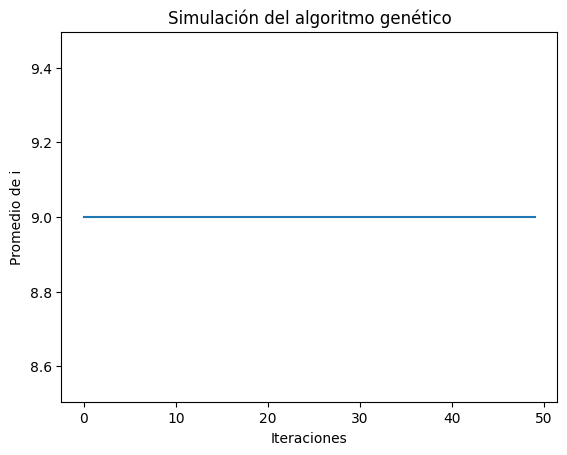

In [141]:

# Lista para almacenar el promedio de i en cada iteración
promedios = []

for i in range(num_iteraciones):
    # Inicializar la población
    poblacion = inicializar_poblacion(M, num_especies, g)

    # Reorganizar el genoma
    poblacion_reorganizada = reorganizar_genoma(poblacion, rho)

    # Destruir especies
    nueva_poblacion = destruir_especies(poblacion_reorganizada, lambd)

    # Transferencia horizontal
    poblacion_final = transferencia_horizontal(nueva_poblacion, tau0, alpha,long)

    # Calcular el promedio de i
    promedio = promedio_i(poblacion_final)

    # Agregar el promedio a la lista
    promedios.append(promedio)

# Graficar los resultados
plt.plot(promedios)
plt.xlabel('Iteraciones')
plt.ylabel('Promedio de i')
plt.title('Simulación del algoritmo genético')
plt.show()


### Simulación corregida

### Simulación inversión

### Reorganizar 2.0

In [176]:
# Misma funcion de reorganizar, con cambios en escoger posiciones:
# En una posicion tiene un 1 y otra tiene un 0
# De esta manera siempre veremos un cambio 

def reorganizar_genoma(poblacion, rho):
    nueva_poblacion = []

    for especie in poblacion:
        aleatorio = random.uniform(0, 1)

        if aleatorio >= rho:
            pos1 = None
            pos2 = None

            # Se elige una primera posición con un 1
            while pos1 is None:
                pos1 = random.randint(0, len(especie)-1)
                if especie[pos1] != 1:
                    pos1 = None

            # Se elige una segunda posición con un 0 distinta de la primera
            while pos2 is None or pos2 == pos1:
                pos2 = random.randint(0, len(especie)-1)
                if especie[pos2] != 0:
                    pos2 = None

            especie[pos1], especie[pos2] = especie[pos2], especie[pos1]

        nueva_poblacion.append(especie)

    return nueva_poblacion

rho = 0
poblacion_reorganizada = reorganizar_genoma(poblacion, rho)
poblacion_reorganizada


[[0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
 [1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 1]]

### Para calcular el max intervalo entre vecinos

In [239]:
# Intervalo más largo entre pares de genes vecinos

def max_intervalo(especie):
    intervalos = [0] * (len(especie) - 1)
    for i in range(len(especie) - 1):
        if especie[i] == 1 and especie[i+1] == 1:
            intervalos[i] = 0
        elif especie[i] == 0 and especie[i+1] == 0:
            intervalos[i] = 0
        else:
            intervalos[i] = 1

    max_interval = max(sum(intervalos[:i+1]), sum(intervalos[i:]))
    return max_interval